In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics/raw/master/ibm-hr-analytics-employee-attrition-performance.zip')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [4]:
#checking Total rows and Column
df.shape

(1470, 35)

In [5]:
#checking null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
#checking for duplicate values
df.duplicated().sum()

0

In [7]:
#checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64


Attrition
No     1233
Yes     237
Name: count, dtype: int64


BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


DailyRate
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: count, Length: 886, dtype: int64


Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


DistanceFromHome
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
"""In dataset two types of data is present int64 and object with the memory usage """

'In dataset two types of data is present int64 and object with the memory usage '

In [10]:
#separating numerical and categorical columns

#checking for categorical column

cat=list(df.select_dtypes(include='object'))
print("Categorical columns: ",cat)
print("\n")

#checking for numerical columns
num=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        num.append(i)
print("numerical columns: ",num)
print("\n")

Categorical columns:  ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


numerical columns:  ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']




In [11]:
#checking no of unique values in each col
df.nunique().to_frame("No of unique values")

,No of unique values
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


In [11]:
#checking the list of counts of target
df["Attrition"].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
'there are 2 categories present in target yes and no'

'there are 2 categories present in target yes and no'

In [13]:
#checking the unique values of target col
df["Attrition"].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [14]:
#statistical summary of numerical col
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Attrition
No     1233
Yes     237
Name: count, dtype: int64


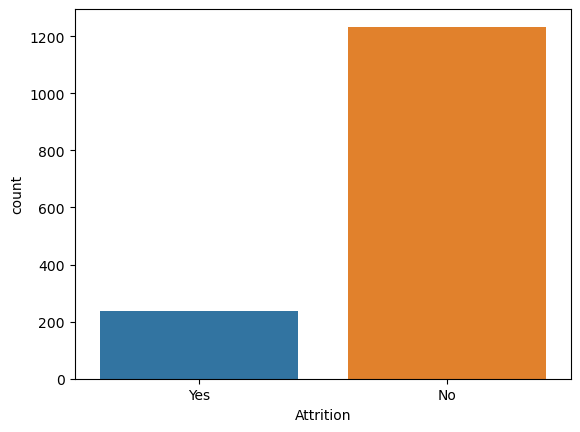

In [15]:
#DATA VISUALIZATION
#visualized the no of Attrition
ax=sns.countplot(x='Attrition',data=df)
print(df['Attrition'].value_counts())

In [16]:
"""we can observe that the count of "No Attrition" are high compared to the count of "yes Attrition" i.e.there
are more number of customers who have not Attrition."""

'we can observe that the count of "No Attrition" are high compared to the count of "yes Attrition" i.e.there\nare more number of customers who have not Attrition.'

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64


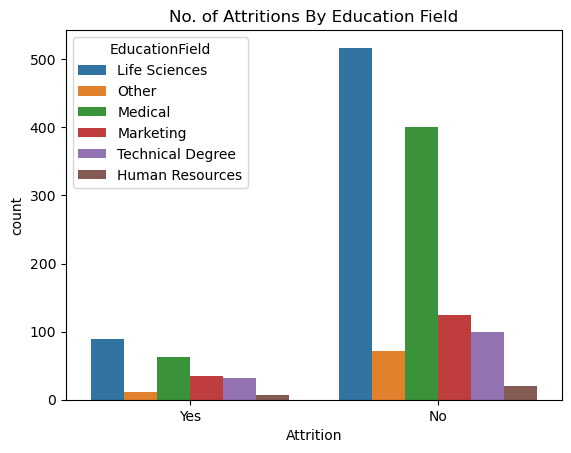

In [17]:
#visualizing the count of Attrition by Education Field
print(df['EducationField'].value_counts())
ax=sns.countplot(x='Attrition',data=df,hue='EducationField',palette='tab10')
plt.title("No. of Attritions By Education Field")
plt.show()

In [18]:
"""From above graph we can see the marketing,technical degree and human resources fields are small proportion of the datasets,
the proportions of the attrited employees are higher."""

'From above graph we can see the marketing,technical degree and human resources fields are small proportion of the datasets,\nthe proportions of the attrited employees are higher.'

Gender
Male      882
Female    588
Name: count, dtype: int64


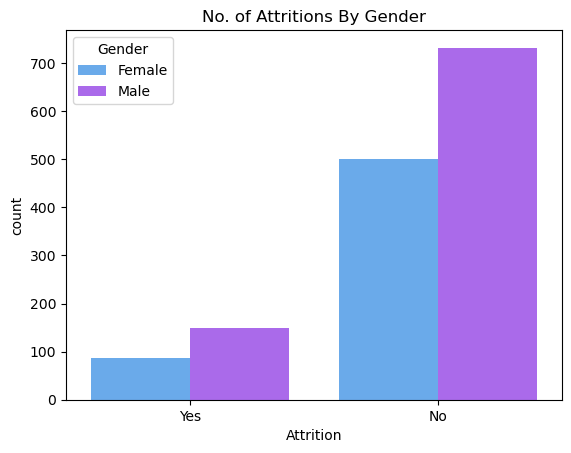

In [19]:
#visualizing the count of Attrition by Gender
print(df['Gender'].value_counts())
ax=sns.countplot(x='Attrition',data=df,hue='Gender',palette='cool')
plt.title("No. of Attritions By Gender")
plt.show()

In [20]:
"'This graph shows the attrited Male employees are higher than the attrited Female Employess.'"

"'This graph shows the attrited Male employees are higher than the attrited Female Employess.'"

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64


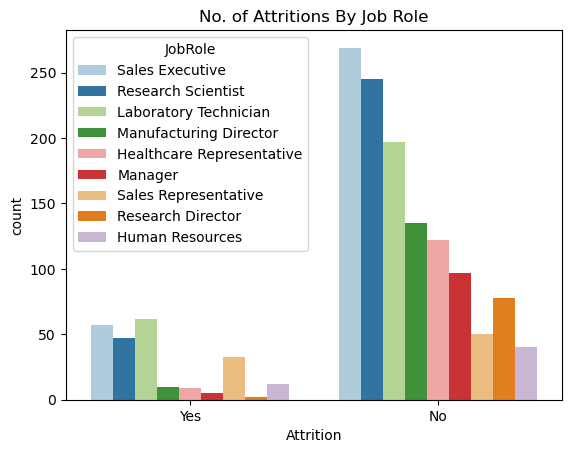

In [21]:
#visualizing the count of Attrition by Job Role
print(df['JobRole'].value_counts())
ax=sns.countplot(x='Attrition',data=df,hue='JobRole',palette='Paired')
plt.title("No. of Attritions By Job Role")
plt.show()

In [22]:
"'From above observation we can say in Sales executive,research scientist,lab technician higher attrited employees than others'"

"'From above observation we can say in Sales executive,research scientist,lab technician higher attrited employees than others'"

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


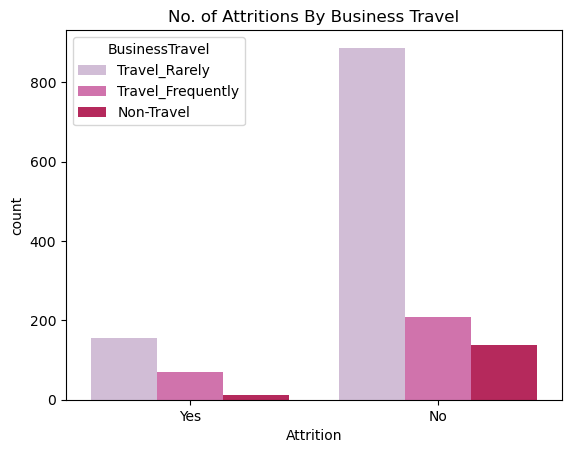

In [23]:
#visualizing the count of Attrition by Business Travel
print(df['BusinessTravel'].value_counts())
ax=sns.countplot(x='Attrition',data=df,hue='BusinessTravel',palette='PuRd')
plt.title("No. of Attritions By Business Travel")
plt.show()

In [24]:
"""Here we can see the Travel Rarely and Travel Frequently attrited employees are higher than the other Non-Travel"""

'Here we can see the Travel Rarely and Travel Frequently attrited employees are higher than the other Non-Travel'

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64


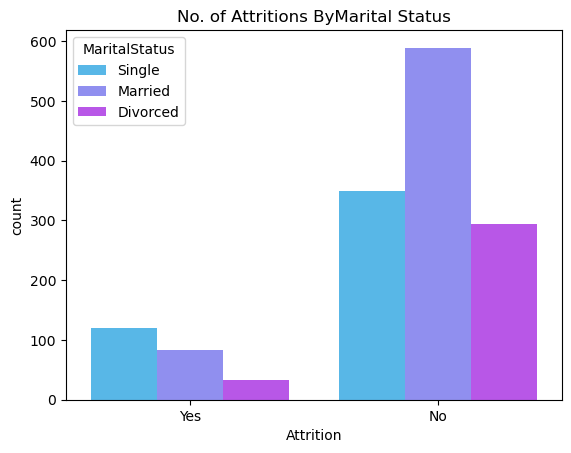

In [25]:
#visualizing the count of Attrition by Marital Status
print(df['MaritalStatus'].value_counts())
ax=sns.countplot(x='Attrition',data=df,hue='MaritalStatus',palette='cool')
plt.title("No. of Attritions ByMarital Status")
plt.show()

In [26]:
"""Here we can see in non-attrited employees married are higher than others"""

'Here we can see in non-attrited employees married are higher than others'

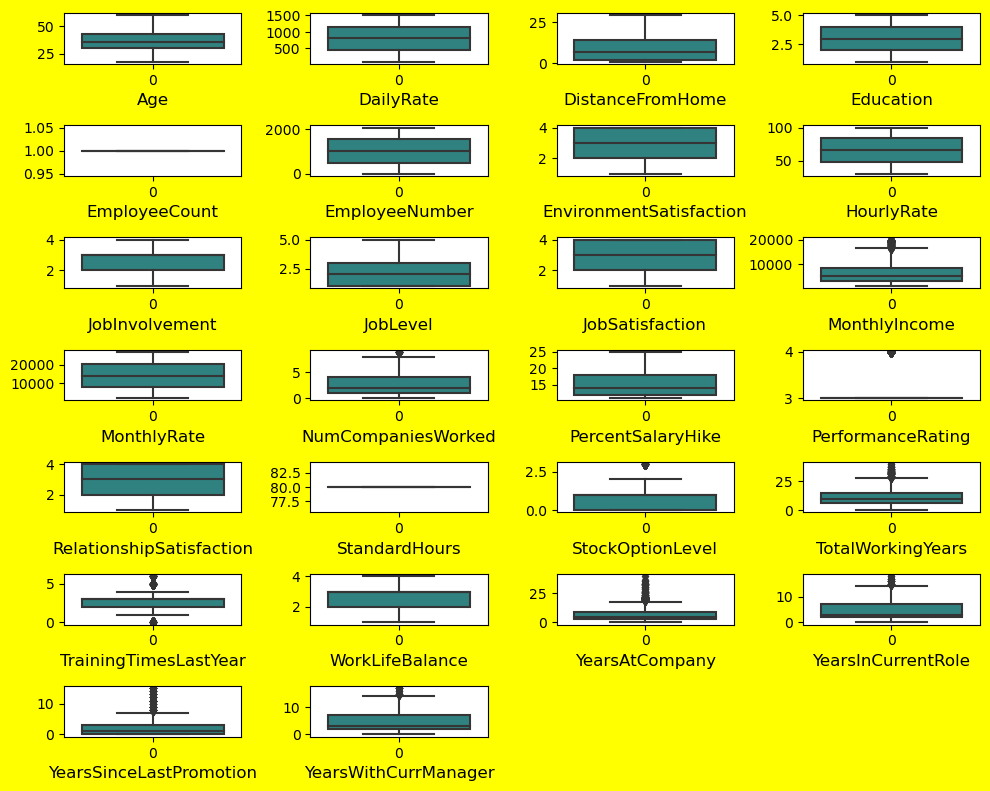

In [27]:
#checking the outliers using boxplot
plt.figure(figsize=(10,8),facecolor="Yellow")
plotnumber=1
for col in num:
    if plotnumber<=26:
        ax=plt.subplot(7,4,plotnumber)
        sns.boxplot(df[col],palette="viridis_r")
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [28]:
"""From above observations we can see the Outliers are present in Monthly income,num companies worked,performance rating,
stock option level,total working years,training times last year,years at company,years in current role, years since last 
promotion,years with curr manager.using zscore and IQR Technique we can remove outliers"""

'From above observations we can see the Outliers are present in Monthly income,num companies worked,performance rating,\nstock option level,total working years,training times last year,years at company,years in current role, years since last \npromotion,years with curr manager.using zscore and IQR Technique we can remove outliers'

In [29]:
from scipy.stats import zscore
z_score=zscore(df[['MonthlyIncome','NumCompaniesWorked','PerformanceRating','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
df=df[filtering_entry]

In [30]:
#after removing outliers
df.shape

(1387, 35)

In [31]:
"""After removing the outliers dataset contains 1387 rows and 35 columns """

'After removing the outliers dataset contains 1387 rows and 35 columns '

In [32]:
#encoding categorical cols using LabelEncoder

from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=lab_enc.fit_transform(df[i].values.reshape(-1,1))
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


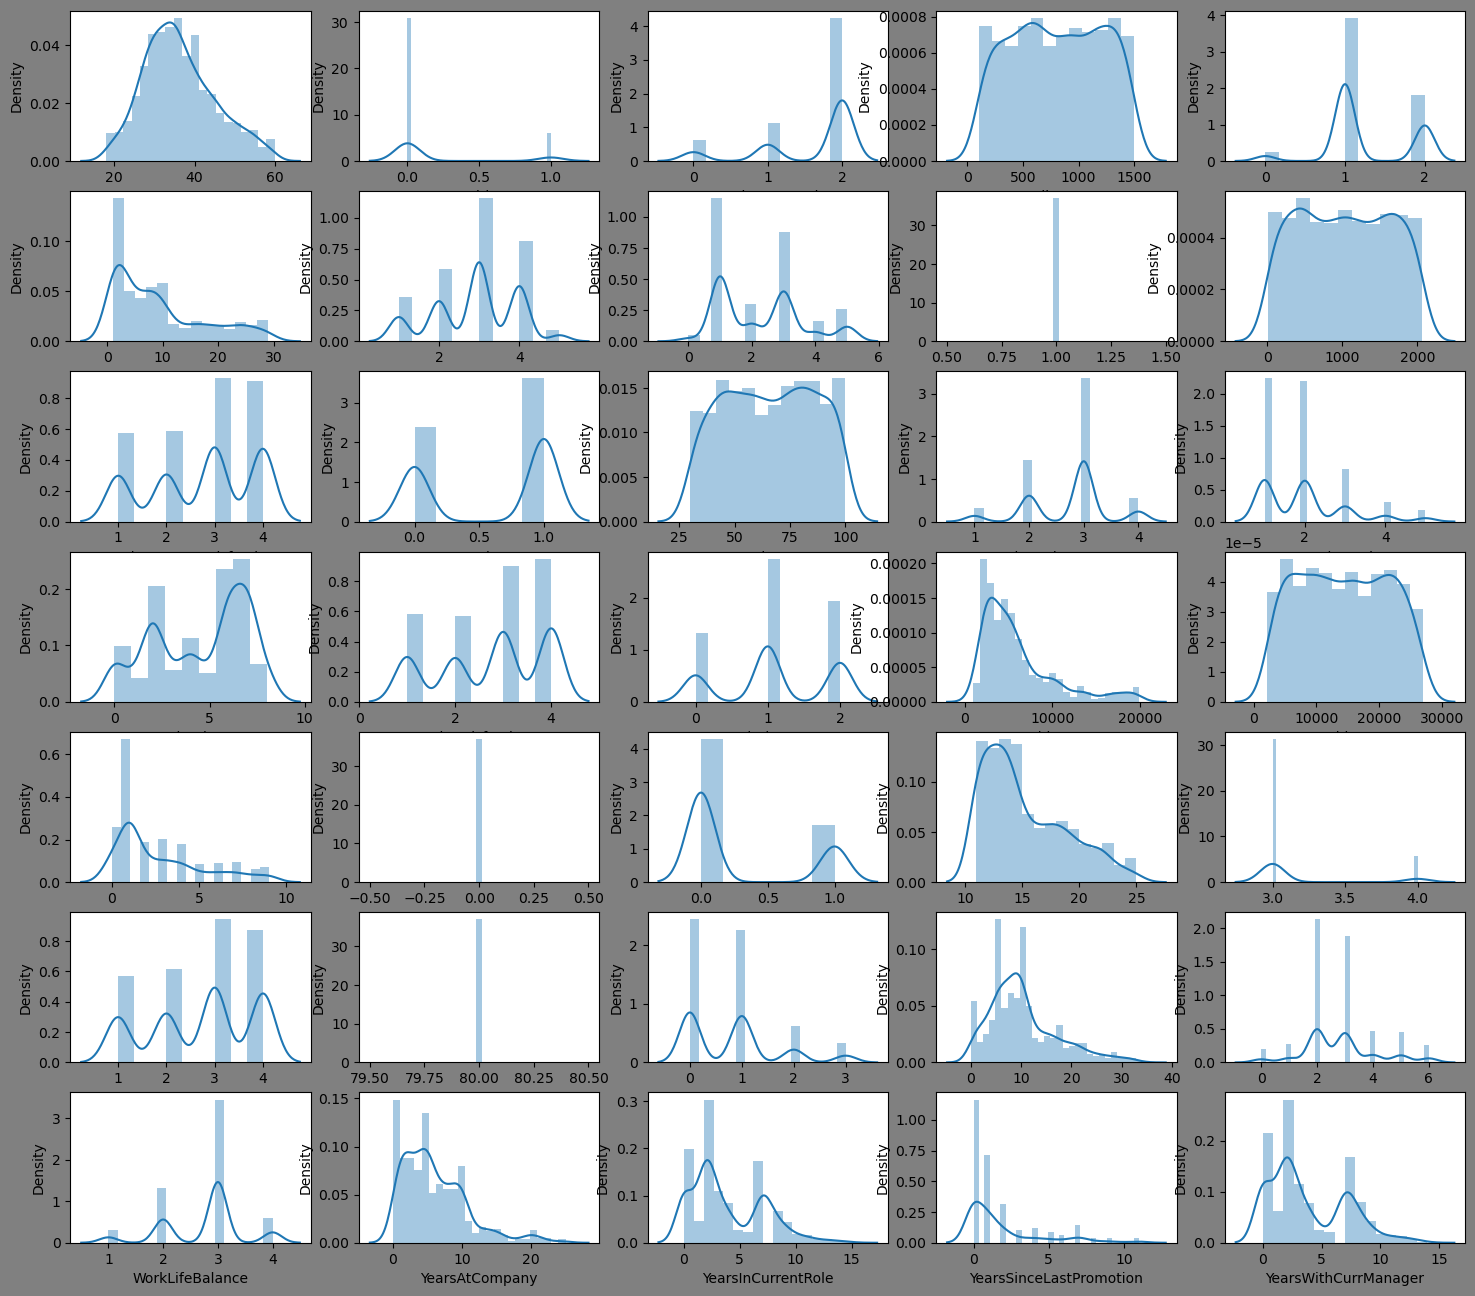

In [33]:
#Cheking For Skewness
#lets see how data is distributed for every column
plt.figure(figsize=(18,16),facecolor='grey')
p=1
for col in df:
    if p<=35:
        ax=plt.subplot(7,5,p)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=10)
    p+=1
plt.show()

In [34]:
df.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EmployeeCount               0.000000
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
Over18                      0.000000
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StandardHours               0.000000
S

In [35]:
"""the col Businesstravel,distancefromhome,JobLevel,MonthlyIncome,NumCompaniesWorked,Overtime,PerformanceRating,
TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion have skewness in the data.since, BusinessTravel,OverTime is 
categorical no need to remove skewness.since remaning all is contineous in natures, using cube root method we can
remove skewness"""

'the col Businesstravel,distancefromhome,JobLevel,MonthlyIncome,NumCompaniesWorked,Overtime,PerformanceRating,\nTotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion have skewness in the data.since, BusinessTravel,OverTime is \ncategorical no need to remove skewness.since remaning all is contineous in natures, using cube root method we can\nremove skewness'

In [36]:
#Using cube root method we can remove skewness
df['DistanceFromHome']=np.cbrt(df['DistanceFromHome'])
df['JobLevel']=np.cbrt(df['JobLevel'])
df['MonthlyIncome']=np.cbrt(df['MonthlyIncome'])
df['NumCompaniesWorked']=np.cbrt(df['NumCompaniesWorked'])
df['PerformanceRating']=np.cbrt(df['PerformanceRating'])
df['TotalWorkingYears']=np.cbrt(df['TotalWorkingYears'])
df['YearsAtCompany']=np.cbrt(df['YearsAtCompany'])
df['YearsSinceLastPromotion']=np.cbrt(df['YearsSinceLastPromotion'])

In [37]:
#again checking skewness
df.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.183373
Education                  -0.289024
EducationField              0.544868
EmployeeCount               0.000000
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    0.508238
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               0.742985
MonthlyRate                 0.030596
NumCompaniesWorked         -0.689329
Over18                      0.000000
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StandardHours               0.000000
S

In [38]:
#checking the correlation between features and target
cor=df.corr()
cor

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159366,0.022340,0.021946,-0.038242,-0.025336,0.198502,-0.032676,NaN,-0.002704,...,0.041744,NaN,0.054506,0.627064,-0.019008,-0.016913,0.177960,0.121508,0.101450,0.121747
Attrition,-0.159366,1.000000,-0.001041,-0.057220,0.063637,0.082048,-0.032703,0.023585,NaN,-0.010169,...,-0.052344,NaN,-0.136676,-0.228715,-0.057285,-0.062492,-0.203407,-0.171015,-0.052245,-0.162297
BusinessTravel,0.022340,-0.001041,1.000000,-0.004606,-0.003521,-0.018892,-0.010560,0.022576,NaN,-0.013273,...,-0.029660,NaN,-0.015159,0.042392,0.010322,-0.014140,-0.008602,-0.029257,-0.027602,-0.044321
DailyRate,0.021946,-0.057220,-0.004606,1.000000,-0.005398,-0.004974,-0.018442,0.040645,NaN,-0.044886,...,0.004516,NaN,0.048361,0.044422,0.005861,-0.044266,0.009147,0.022899,-0.037737,-0.011516
Department,-0.038242,0.063637,-0.003521,-0.005398,1.000000,0.035218,0.012846,0.013432,NaN,-0.007828,...,-0.037705,NaN,-0.003424,-0.007723,0.036092,0.026978,0.013848,0.065536,0.017221,0.034216
DistanceFromHome,-0.025336,0.082048,-0.018892,-0.004974,0.035218,1.000000,0.002841,0.010756,NaN,0.034088,...,0.009816,NaN,0.035437,-0.004807,-0.019576,-0.029395,0.009664,0.011025,-0.000831,0.001193
Education,0.198502,-0.032703,-0.010560,-0.018442,0.012846,0.002841,1.000000,-0.038017,NaN,0.042707,...,-0.002393,NaN,0.028494,0.155944,-0.026879,0.007844,0.036109,0.058007,0.014855,0.031210
EducationField,-0.032676,0.023585,0.022576,0.040645,0.013432,0.010756,-0.038017,1.000000,NaN,0.000058,...,-0.013734,NaN,-0.015355,-0.004469,0.050502,0.034038,0.001351,-0.010614,0.021206,0.013437
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.002704,-0.010169,-0.013273,-0.044886,-0.007828,0.034088,0.042707,0.000058,NaN,1.000000,...,-0.063017,NaN,0.063896,0.000936,0.018555,0.006280,0.018413,-0.001112,0.013499,-0.006224


In [39]:
"""here we can see the value of columns Employee Count,Over18,StandardHours have the NaN values in correlation because 
originally it contains unique value counts.So,we removing it."""

#Dropping EmployeeCount,Over18,StandardHours col
df.drop("EmployeeCount",axis=1,inplace=True)
df.drop("Over18",axis=1,inplace=True)
df.drop("StandardHours",axis=1,inplace=True)

In [40]:
#Again checking the correlation between features and target
cor=df.corr()
cor

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159366,0.022340,0.021946,-0.038242,-0.025336,0.198502,-0.032676,-0.002704,0.014098,...,-0.000617,0.041744,0.054506,0.627064,-0.019008,-0.016913,0.177960,0.121508,0.101450,0.121747
Attrition,-0.159366,1.000000,-0.001041,-0.057220,0.063637,0.082048,-0.032703,0.023585,-0.010169,-0.112393,...,0.010781,-0.052344,-0.136676,-0.228715,-0.057285,-0.062492,-0.203407,-0.171015,-0.052245,-0.162297
BusinessTravel,0.022340,-0.001041,1.000000,-0.004606,-0.003521,-0.018892,-0.010560,0.022576,-0.013273,0.001183,...,-0.018274,-0.029660,-0.015159,0.042392,0.010322,-0.014140,-0.008602,-0.029257,-0.027602,-0.044321
DailyRate,0.021946,-0.057220,-0.004606,1.000000,-0.005398,-0.004974,-0.018442,0.040645,-0.044886,0.033123,...,0.000574,0.004516,0.048361,0.044422,0.005861,-0.044266,0.009147,0.022899,-0.037737,-0.011516
Department,-0.038242,0.063637,-0.003521,-0.005398,1.000000,0.035218,0.012846,0.013432,-0.007828,-0.014540,...,-0.039364,-0.037705,-0.003424,-0.007723,0.036092,0.026978,0.013848,0.065536,0.017221,0.034216
DistanceFromHome,-0.025336,0.082048,-0.018892,-0.004974,0.035218,1.000000,0.002841,0.010756,0.034088,-0.013476,...,0.015406,0.009816,0.035437,-0.004807,-0.019576,-0.029395,0.009664,0.011025,-0.000831,0.001193
Education,0.198502,-0.032703,-0.010560,-0.018442,0.012846,0.002841,1.000000,-0.038017,0.042707,-0.026223,...,-0.023487,-0.002393,0.028494,0.155944,-0.026879,0.007844,0.036109,0.058007,0.014855,0.031210
EducationField,-0.032676,0.023585,0.022576,0.040645,0.013432,0.010756,-0.038017,1.000000,0.000058,0.047924,...,-0.003621,-0.013734,-0.015355,-0.004469,0.050502,0.034038,0.001351,-0.010614,0.021206,0.013437
EmployeeNumber,-0.002704,-0.010169,-0.013273,-0.044886,-0.007828,0.034088,0.042707,0.000058,1.000000,0.011003,...,-0.027355,-0.063017,0.063896,0.000936,0.018555,0.006280,0.018413,-0.001112,0.013499,-0.006224
EnvironmentSatisfaction,0.014098,-0.112393,0.001183,0.033123,-0.014540,-0.013476,-0.026223,0.047924,0.011003,1.000000,...,-0.025299,0.018414,0.013330,-0.018817,-0.019318,0.032492,0.010151,0.038837,0.041294,0.001606


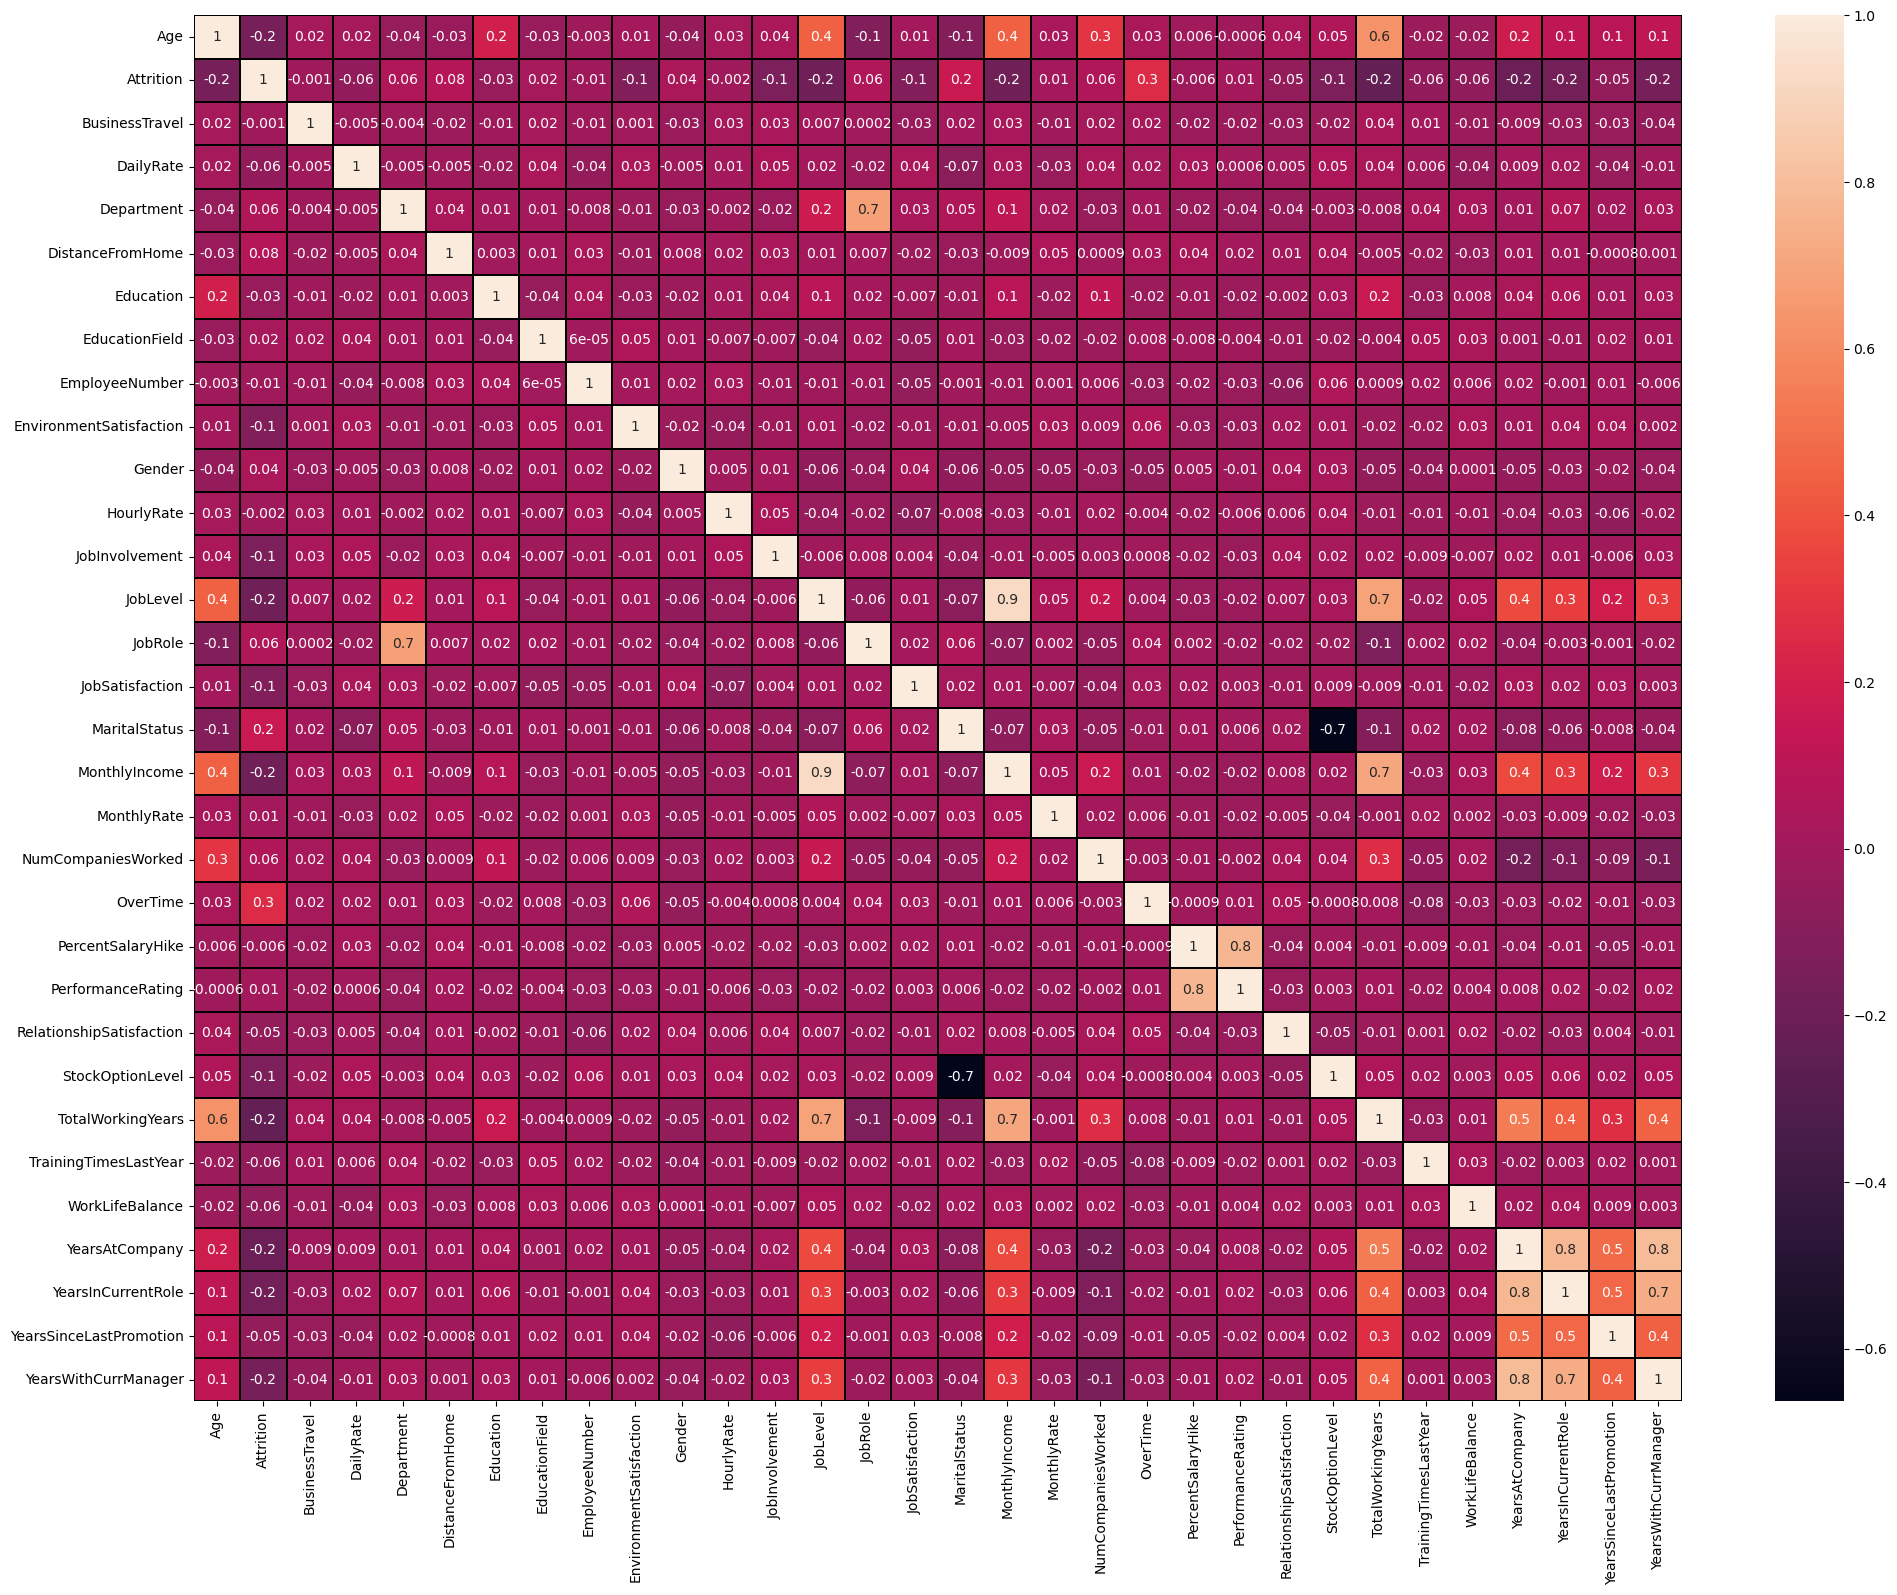

In [43]:
#visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(24,18))
sns.heatmap(df.corr(),linewidths=0.2,fmt=".1g",linecolor="black",annot=True)
plt.yticks(rotation=0);
plt.show()

In [44]:
"""Here we can see environmentsatisfaction,JonInvolvement,JobLevel,Jobsatisfaction,MonthlyIncome,StockOptionLevel,
TotalworkingYears,Yearsatcompany,YearsIncurrentRole,YearsWithCurrManager are more related to Attrition i.e.Target variable."""

'Here we can see environmentsatisfaction,JonInvolvement,JobLevel,Jobsatisfaction,MonthlyIncome,StockOptionLevel,\nTotalworkingYears,Yearsatcompany,YearsIncurrentRole,YearsWithCurrManager are more related to Attrition i.e.Target variable.'

In [45]:
#We can observe the positive and negative correlated features with the target
cor['Attrition'].sort_values(ascending = False)

Attrition                   1.000000
OverTime                    0.257237
MaritalStatus               0.160960
DistanceFromHome            0.082048
JobRole                     0.064283
Department                  0.063637
NumCompaniesWorked          0.055629
Gender                      0.036252
EducationField              0.023585
MonthlyRate                 0.014888
PerformanceRating           0.010781
BusinessTravel             -0.001041
HourlyRate                 -0.001532
PercentSalaryHike          -0.006267
EmployeeNumber             -0.010169
Education                  -0.032703
YearsSinceLastPromotion    -0.052245
RelationshipSatisfaction   -0.052344
DailyRate                  -0.057220
TrainingTimesLastYear      -0.057285
WorkLifeBalance            -0.062492
EnvironmentSatisfaction    -0.112393
JobSatisfaction            -0.114206
JobInvolvement             -0.133957
StockOptionLevel           -0.136676
Age                        -0.159366
YearsWithCurrManager       -0.162297
Y

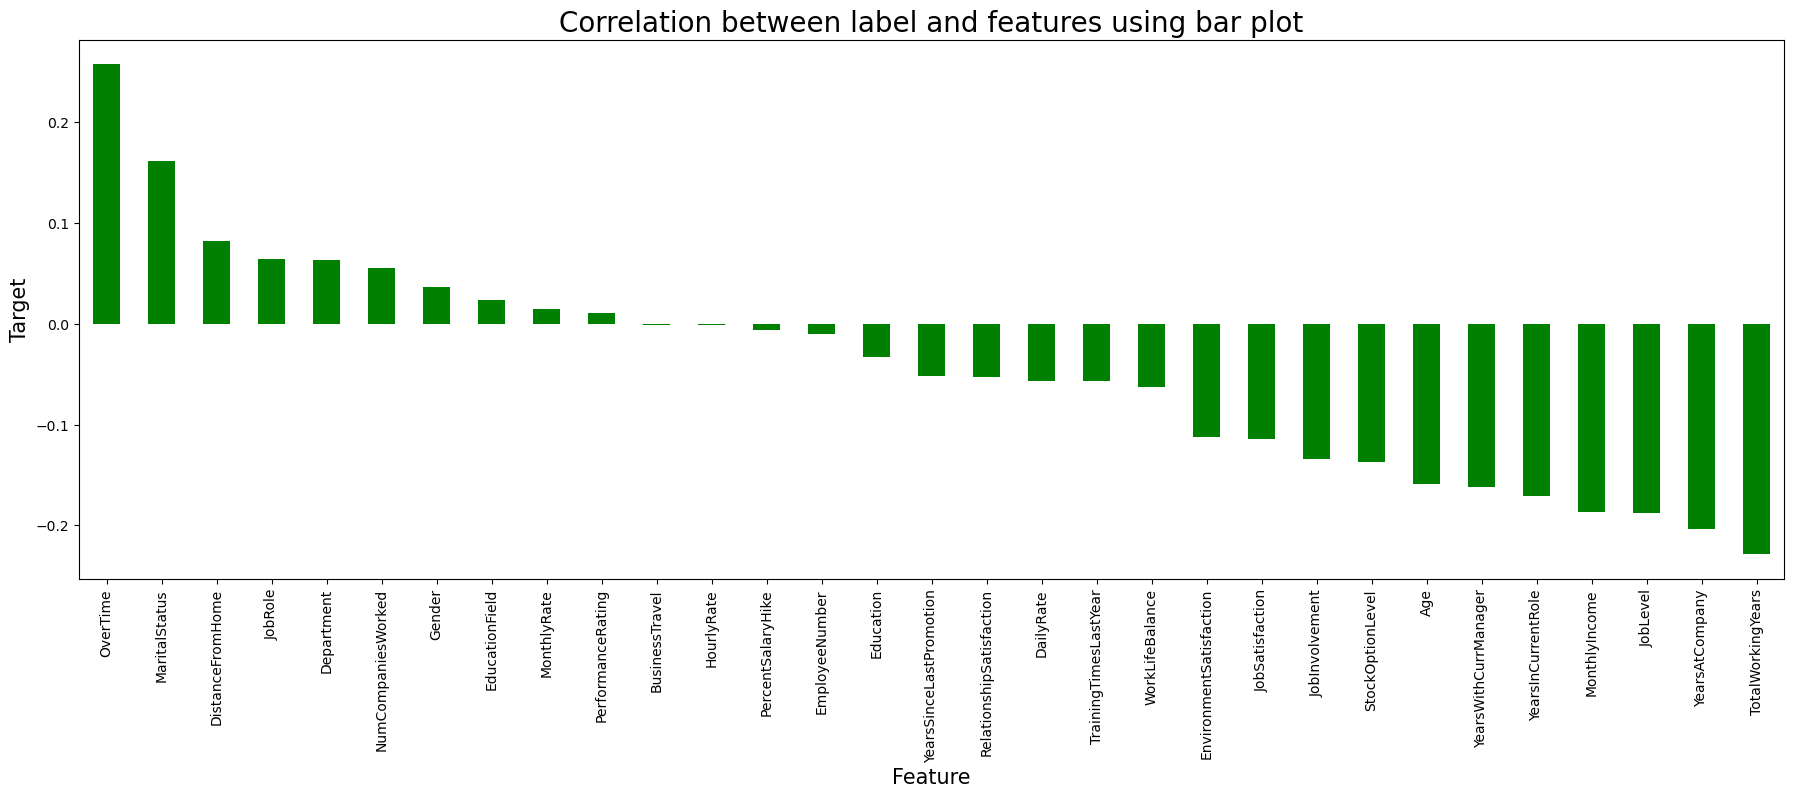

In [46]:
#visualizing the correlation between label and features using bar plot
plt.figure(figsize=(22,7))
df.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind="bar",color="g")
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15);
plt.title("Correlation between label and features using bar plot",fontsize=20)
plt.show()

In [47]:
"""From the above bar plot we can notice the +ve and -ve correlation between the features and the 
target. Here the features BusinessTravel and the HourlyRate have very less correlation with the col"""

'From the above bar plot we can notice the +ve and -ve correlation between the features and the \ntarget. Here the features BusinessTravel and the HourlyRate have very less correlation with the col'

In [48]:
#separating features and label
x=df.drop("Attrition",axis=1)
y=df["Attrition"]

In [49]:
#Feature Scaling using Standard Scalarization
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.536681,0.593126,0.734325,1.405373,-1.410317,-0.876177,-0.940815,-1.702014,-0.665328,-1.229911,...,-0.424765,-1.575817,-0.929427,-0.114048,-2.171420,-2.501172,0.252482,0.040903,-1.092503,0.368270
1,1.442111,-0.905354,-1.307769,-0.496337,0.161865,-1.853858,-0.940815,-1.700354,0.251978,0.813067,...,2.354241,1.199034,0.238250,0.184647,0.151871,0.336558,0.878987,0.965895,0.294582,0.982200
2,0.083966,0.593126,1.406752,-0.496337,-1.001674,-0.876177,1.305159,-1.697034,1.169285,0.813067,...,-0.424765,-0.650866,-0.929427,-0.282450,0.151871,0.336558,-3.122519,-1.192419,-1.092503,-1.166556
3,-0.368749,-0.905354,1.453896,-0.496337,-0.715020,1.079185,-0.940815,-1.695374,1.169285,-1.229911,...,-0.424765,0.274084,-0.929427,-0.114048,0.151871,0.336558,0.592150,0.965895,0.908019,-1.166556
4,-1.047821,0.593126,-0.533609,-0.496337,-1.001674,-1.853858,0.556501,-1.692054,-1.582635,0.813067,...,-0.424765,1.199034,0.238250,-0.467759,0.151871,0.336558,-0.782424,-0.575758,0.655114,-0.552626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,-0.029213,-0.905354,0.193406,-0.496337,1.488578,-0.876177,0.556501,1.717604,0.251978,0.813067,...,-0.424765,0.274084,0.238250,0.990880,0.151871,0.336558,0.053478,-0.575758,-1.092503,-0.245661
1383,0.310324,0.593126,-0.479021,-0.496337,-0.125655,-1.853858,0.556501,1.719264,1.169285,0.813067,...,-0.424765,-1.575817,0.238250,0.040844,1.700732,0.336558,0.430434,0.965895,0.294582,0.982200
1384,-1.047821,0.593126,-1.615447,-0.496337,-0.486815,0.101504,-0.940815,1.722584,-0.665328,0.813067,...,2.354241,-0.650866,0.238250,-0.467759,-2.171420,0.336558,0.252482,-0.575758,-1.092503,-0.245661
1385,1.442111,-0.905354,0.538304,1.405373,-1.001674,0.101504,0.556501,1.724244,1.169285,0.813067,...,-0.424765,1.199034,-0.929427,0.990880,0.151871,-1.082307,0.740892,0.657565,-1.092503,1.289165


In [50]:
#Checking Variance Inflation Factor(VIF)
#finding variance inflation factor in each scaled col 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) 
for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF Values,Features
0,1.848211,Age
1,1.019137,BusinessTravel
2,1.029991,DailyRate
3,2.091185,Department
4,1.019444,DistanceFromHome
5,1.062486,Education
6,1.020485,EducationField
7,1.024608,EmployeeNumber
8,1.025690,EnvironmentSatisfaction
9,1.025665,Gender


In [51]:
"""By checking VIF values we can see the no multicollinarity problem. """

'By checking VIF values we can see the no multicollinarity problem. '

In [52]:
y.value_counts()

Attrition
0    1158
1     229
Name: count, dtype: int64

In [53]:
"'Here we can see that the data is not balanced,SO we will balance the data using oversampling method'"

"'Here we can see that the data is not balanced,SO we will balance the data using oversampling method'"

In [54]:
#OVERSAMPLING
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x, y)

In [55]:
#checking value count of target col
y.value_counts()

Attrition
0    1158
1     229
Name: count, dtype: int64

In [56]:
y1.value_counts()

Attrition
1    1158
0    1158
Name: count, dtype: int64

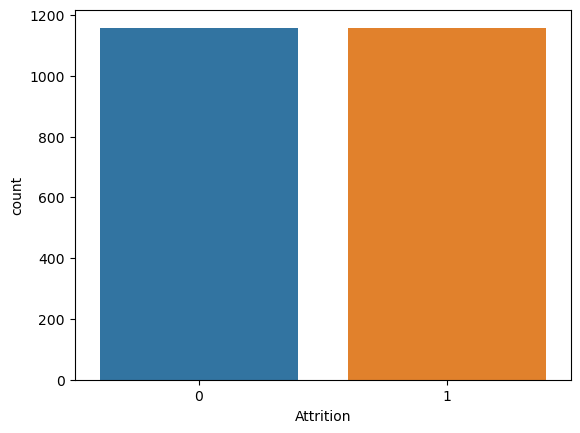

In [57]:
"""Now,we can see the data is balanced"""
#checking the count of Attrition
sns.countplot(data=df,x=y1)
plt.show()

In [80]:
#split into train test data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=106)

In [81]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier

def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("\n----------------Train Result------------------\n")
        print(f"Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%")
    elif train==False:
        pred=clf.predict(x_test)
        print("\n----------------Test Result------------------\n")
        print(f"Accuracy Score: {accuracy_score(y_test,pred)*100:.2f}%")
        print('\n\n The Classification Report\n', classification_report(y_test,pred,digits=2))

In [82]:
random_clf=RandomForestClassifier()
random_clf.fit(x_train,y_train)

RandomForestClassifier()

In [83]:
metric_score(random_clf,x_train,x_test,y_train,y_test,train=True)
metric_score(random_clf,x_train,x_test,y_train,y_test,train=False)


----------------Train Result------------------

Accuracy Score: 100.00%

----------------Test Result------------------

Accuracy Score: 92.95%


 The Classification Report
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       335
           1       0.97      0.89      0.93       360

    accuracy                           0.93       695
   macro avg       0.93      0.93      0.93       695
weighted avg       0.93      0.93      0.93       695



In [84]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [85]:
metric_score(LR,x_train,x_test,y_train,y_test,train=True)
metric_score(LR,x_train,x_test,y_train,y_test,train=False)


----------------Train Result------------------

Accuracy Score: 80.88%

----------------Test Result------------------

Accuracy Score: 75.11%


 The Classification Report
               precision    recall  f1-score   support

           0       0.72      0.78      0.75       335
           1       0.78      0.72      0.75       360

    accuracy                           0.75       695
   macro avg       0.75      0.75      0.75       695
weighted avg       0.75      0.75      0.75       695



In [86]:
from sklearn.ensemble import ExtraTreesClassifier
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)

ExtraTreesClassifier()

In [87]:
metric_score(ETC,x_train,x_test,y_train,y_test,train=True)
metric_score(ETC,x_train,x_test,y_train,y_test,train=False)


----------------Train Result------------------

Accuracy Score: 100.00%

----------------Test Result------------------

Accuracy Score: 95.40%


 The Classification Report
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       335
           1       0.96      0.95      0.96       360

    accuracy                           0.95       695
   macro avg       0.95      0.95      0.95       695
weighted avg       0.95      0.95      0.95       695



In [88]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [89]:
metric_score(svc,x_train,x_test,y_train,y_test,train=True)
metric_score(svc,x_train,x_test,y_train,y_test,train=False)


----------------Train Result------------------

Accuracy Score: 96.67%

----------------Test Result------------------

Accuracy Score: 89.64%


 The Classification Report
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       335
           1       0.89      0.91      0.90       360

    accuracy                           0.90       695
   macro avg       0.90      0.90      0.90       695
weighted avg       0.90      0.90      0.90       695



In [90]:
#..........CROSS VALIDATION SCORE........
from sklearn.model_selection import cross_val_score

In [91]:
#checking cv score for Random Forest Classifier
score=cross_val_score(random_clf,x,y)
print(score)
print(score.mean())

#here predicting once again because variables inside the function are local variables
pred=random_clf.predict(x_test)
acc_score1=accuracy_score(y_test,pred)
acc_score1

print("Difference between Accuracy Score and Cross Validation Score:",acc_score1-score.mean())

[0.84892086 0.85971223 0.85198556 0.85559567 0.84476534]
0.8521959327844584
Difference between Accuracy Score and Cross Validation Score: 0.07730047009323948


In [92]:
#checking cv score for Logistic Regression
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())

#here predicting once again because variables inside the function are local variables
pred=LR.predict(x_test)
acc_score2=accuracy_score(y_test,pred)
acc_score2

print("Difference between Accuracy Score and Cross Validation Score:",acc_score2-score.mean())

[0.87769784 0.86690647 0.86281588 0.87725632 0.87364621]
0.8716645456198219
Difference between Accuracy Score and Cross Validation Score: -0.12058540892917435


In [93]:
#checking cv score for Support Vector Machine
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())

#here predicting once again because variables inside the function are local variables
pred=svc.predict(x_test)
acc_score3=accuracy_score(y_test,pred)
acc_score3

print("Difference between Accuracy Score and Cross Validation Score:",acc_score3-score.mean())

[0.86690647 0.84892086 0.86281588 0.85559567 0.87364621]
0.8615770199724697
Difference between Accuracy Score and Cross Validation Score: 0.034825857725372056


In [94]:
#checking cv score for Extra Trees Classifier
score=cross_val_score(ETC,x,y)
print(score)
print(score.mean())

#here predicting once again because variables inside the function are local variables
pred=ETC.predict(x_test)
acc_score4=accuracy_score(y_test,pred)
acc_score4

print("Difference between Accuracy Score and Cross Validation Score:",acc_score4-score.mean())

[0.85251799 0.86330935 0.86281588 0.85198556 0.85920578]
0.8579669116692207
Difference between Accuracy Score and Cross Validation Score: 0.09598992286315344


In [95]:
"""Logistic Regression is our best model as the difference between accuracy score and cross 
validation score is least

...............Logistic Regression IS OUR BEST MODEL......"""

'Logistic Regression is our best model as the difference between accuracy score and cross \nvalidation score is least\n\n...............Logistic Regression IS OUR BEST MODEL......'

In [96]:
#Hyperparameter Tunning
from sklearn.model_selection import GridSearchCV
param = {'penalty':['l1','l2','elasticnet','none'],
         
      'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
      'max_iter'  : [10,50,80,150]
      }
gscv=GridSearchCV(LogisticRegression(),param,n_jobs=-1,cv=5,verbose=True)
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [10, 50, 80, 150],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']},
             verbose=True)

In [97]:
gscv.best_params_

{'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'}

In [98]:
model=LogisticRegression(penalty='l1',max_iter=50,solver='liblinear')
model.fit(x_train,y_train)
pred=model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

75.39568345323741


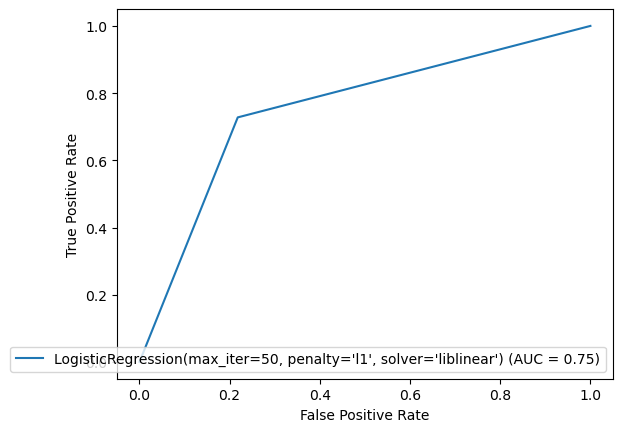

In [99]:
from sklearn.metrics import roc_curve
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=model)
display.plot()

In [100]:
#saving model
import joblib
joblib.dump(model,"HR.pkl")

['HR.pkl']

In [101]:
model=joblib.load("HR.pkl")
prediction=model.predict(x_test)
prediction

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [102]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

,Predicted,Original
0,0,0
1,0,0
2,0,1
3,1,1
4,1,1
...,...,...
690,1,0
691,1,1
692,1,1
693,1,0


In [ ]:
>>In this dataset No null and duplicate values.
>>In dataset total 1470 rows with 35 columns are present.
>>Done the Data Visualization by Attrition.
>>the count of "No Attrition" are high compared to the count of "yes Attrition" i.e.there
  are more number of customers who have not Attrited.
>>visualizing the count of Attrition by Education Field
>>the attrited Male employees are higher than the attrited Female Employess.
>> InJob Role Sales executive,research scientist,lab technician higher attrited employees than others.
>>In Marital status non-attrited employees married are higher than others.
>>Removing outliers of numerical columns using Zscore and IQR techniques.
>>Encoding categorical data into numeric using LabelEncoding.
>>Removing skewness of contineous data using Cube root method.
>>visualizing the correlation matrix by plotting heatmap and barplot.
>>separating features and label.
>>Feature Scaling using Standard Scalarization.
>>Solving Multicollinearity problem using Variance Inflation Factors.
>>Using Oversampling SMOTE function balancing imbalance data.
>>creating train test split.
>>Target variable have the categorical data therefore use Classification model.
>>Finding cross validation score on various models.
>>Logistic Regression is our best model as the difference between accuracy score and cross 
  validation score is least.
>>The best accuracy score is 75.39% for prediction of attrited employees.